use pandas plot
scatter: df.plot.scatter()
hex plot: df.plot.hex()
stacked bar plot: df.plot.bar(stacked=True)
bivariate line plot.

In [1]:
import pandas as pd
reviews = pd.read_csv("csv/winemag-data_first150k.csv", index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
%matplotlib inline

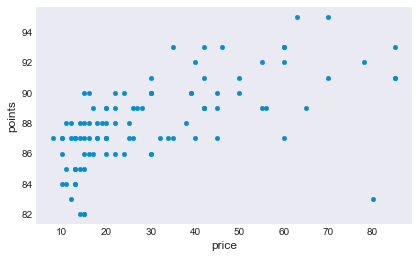

In [7]:
reviews[reviews['price']<100].sample(100).plot.scatter(x='price', y='points');

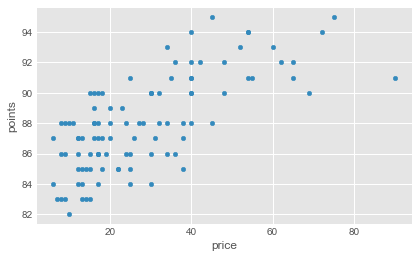

In [9]:
plt.style.use('ggplot')
reviews[reviews['price']<100].sample(100).plot.scatter(x='price', y='points');

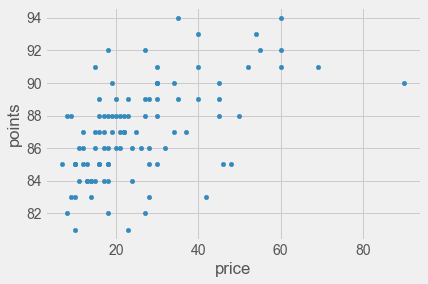

In [10]:
plt.style.use('fivethirtyeight')
reviews[reviews['price']<100].sample(100).plot.scatter(x='price', y='points');

### stacked plot

In [11]:
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


In [14]:
reviews.points.unique()

array([ 96,  95,  94,  90,  91,  86,  89,  88,  87,  93,  92,  85,  84,
        83,  82,  81, 100,  99,  98,  97,  80], dtype=int64)

In [16]:
reviews.winery.unique()

array(['Heitz', 'Bodega Carmen Rodríguez', 'Macauley', ..., 'Screwed',
       'Red Bucket', 'White Knot'], dtype=object)

In [41]:
reviews.winery.value_counts()[:5]

Williams Selyem          374
Testarossa               274
DFJ Vinhos               258
Chateau Ste. Michelle    225
Columbia Crest           217
Name: winery, dtype: int64

In [28]:
reviews.describe(include=['O'])

,country,description,designation,province,region_1,region_2,variety,winery
count,150925,150930,105195,150925,125870,60953,150930,150930
unique,48,97821,30621,455,1236,18,632,14810
top,US,"Powerful in Zinny character, this blend of Dry...",Reserve,California,Napa Valley,Central Coast,Chardonnay,Williams Selyem
freq,62397,6,2752,44508,6209,13057,14482,374


In [42]:
wanted_cols = ['Williams Selyem','Testarossa', 'DFJ Vinhos', 'Chateau Ste. Michelle', 'Columbia Crest']

In [57]:
wine_counts = reviews[reviews.winery.isin(wanted_cols)]

In [58]:
wine_counts.shape

(1348, 10)

In [59]:
wine_counts = wine_counts[['points','price','winery']].reset_index(drop=True)

In [60]:
wine_counts.head(3)

,points,price,winery
0,87,10.0,Chateau Ste. Michelle
1,88,61.0,Testarossa
2,94,65.0,Testarossa


In [61]:
pd.pivot_table(index='points',values='price', columns='winery',aggfunc='count', data=wine_counts)

winery,Chateau Ste. Michelle,Columbia Crest,DFJ Vinhos,Testarossa,Williams Selyem
points,,,,,
80,NaN,NaN,NaN,NaN,1.0
83,2.0,5.0,11.0,NaN,1.0
84,6.0,4.0,48.0,2.0,0.0
85,14.0,12.0,49.0,1.0,2.0
86,15.0,33.0,31.0,7.0,11.0
87,35.0,56.0,19.0,32.0,18.0
88,50.0,59.0,27.0,27.0,13.0
89,34.0,14.0,23.0,10.0,20.0
90,27.0,16.0,25.0,22.0,21.0
